In [1]:
import sys
import json
import pandas as pd
from pandas.io.json import json_normalize
sys.path.append("../") # Enables importing from parent directory
import fpl_draft_league as fpl
import transactions as trxns
import matplotlib.pyplot as plt
import datetime

### Transactions Json

In [2]:
with open('../data/transactions.json') as json_data:
        d = json.load(json_data)
        transactions_df = json_normalize(d['transactions'])

### Elements json

In [3]:
with open('../data/transactions.json') as json_data:
        d = json.load(json_data)
        elements_df = json_normalize(d['elements'])

### Details json

In [4]:
with open('../data/transactions.json') as json_data:
        d = json.load(json_data)
        entries_df = json_normalize(d['league_entries'])

## Total transactions by player
I've got the transactions_df, and can get the league_entries_df, so just need to join these to and then do some aggregation.

In [5]:
df = trxns.get_transactions_df(entries_df, elements_df, transactions_df)
df.head()

,added,event,index,kind,priority,result,player_first_name,player_in,player_out
1,2019-08-11,2,3.0,w,2.0,a,Thomas,Moise Kean,Javier Hernández Balcázar
2,2019-08-11,2,21.0,w,3.0,a,Thomas,Lewis Dunk,Joel Matip
8,2019-08-15,2,13.0,w,2.0,a,ben,Ainsley Maitland-Niles,Sead Kolasinac
9,2019-08-15,2,28.0,w,3.0,a,ben,Kyle Walker-Peters,Shkodran Mustafi
11,2019-08-15,2,49.0,w,5.0,a,ben,Andreas Pereira,Mesut Özil


In [6]:
rankings = trxns.get_trxn_rankings(df)
rankings

,count
player_first_name,
John,41
Benji,39
Cory,32
Thomas,29
James,25
ben,21
Dave,18
Rebecca,12
Liam,8


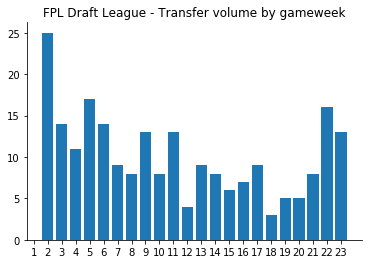

,event,player_in
0,2,25
1,3,14
2,4,11
3,5,17
4,6,14
5,7,9
6,8,8
7,9,13
8,10,8
9,11,13


In [7]:
trxns.chart_trxn_vol(df)